### IIR

Some simple examples from (geeksforgeeks)[https://www.geeksforgeeks.org/design-an-iir-notch-filter-to-denoise-signal-using-python/] for IIR filter implementation in Python

This example builds a filter using the iirnotch function from scipy.  Note that the coeficients returned in freqz uses a normalized frequency, if the sample rate is 2 pi, then Nyquist will be pi.  

The filter is applied using filtfilt from scipy.


In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create/view notch filter
samp_freq = 1000       # Sample frequency (Hz)
notch_freq = 50.0      # Frequency to be removed from signal (Hz)
quality_factor = 10.0  # Quality factor => fc / Q => 3dB bandwidth, 2.5 Hz in this case

In [29]:
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
 
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=2*np.pi)

In [30]:
# h is the response h(w), or transfer function for y = h * x
h[:3]
phase = np.arctan(np.imag(h)/np.real(h))

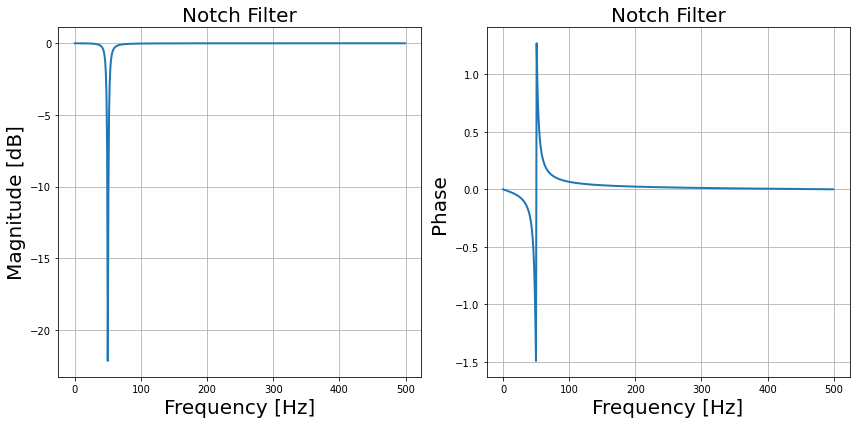

In [31]:

# Plot magnitude response of the filter
# 20 log10 ( h )
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(freq*samp_freq/(2*np.pi), 20 * np.log10(abs(h)),
          label='Bandpass filter [Mag]', linewidth='2')
 
ax[0].set_xlabel('Frequency [Hz]', fontsize=20)
ax[0].set_ylabel('Magnitude [dB]', fontsize=20)
ax[0].set_title('Notch Filter', fontsize=20)
ax[0].grid()
ax[1].plot(freq*samp_freq/(2*np.pi), phase,
          label='Bandpass filter [Phase]', linewidth='2')
 
ax[1].set_xlabel('Frequency [Hz]', fontsize=20)
ax[1].set_ylabel('Phase ', fontsize=20)
ax[1].set_title('Notch Filter', fontsize=20)
ax[1].grid()
#plt.grid()
fig.tight_layout()
plt.show()

In [43]:

# Create and view signal that is a mixture
# of two different frequencies
f0 = 5;  A0=0; 
f1 = 15; A1=1; # Frequency of 1st signal in Hz
f2 = 50; A2=2; # Frequency of 2nd signal in Hz
 
# Set time vector, implicitly 0 to 1 second (50 hz will have 50 cycles)
# Generate 1000 sample sequence in 1 sec
t = np.linspace(0, 1, 1000)

In [44]:
# Signal, add 0.1 distributed GWN
s = A0*np.sin(2*np.pi*f0*t) + A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + \
    np.random.normal(0, .1, 1000)*0.03

Text(0.5, 1.0, 'Signal')

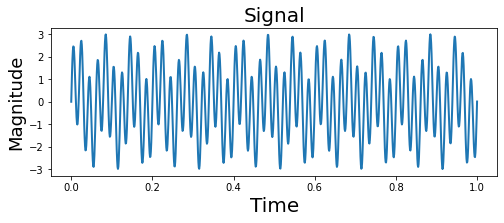

In [45]:

fig = plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(t, s, linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Signal', fontsize=20)

In [46]:
# Apply notch filter to the noisy signal using signal.filtfilt
# Documentation also mentions that fn sosfiltfilt is prefered
y = signal.filtfilt(b_notch, a_notch, s)

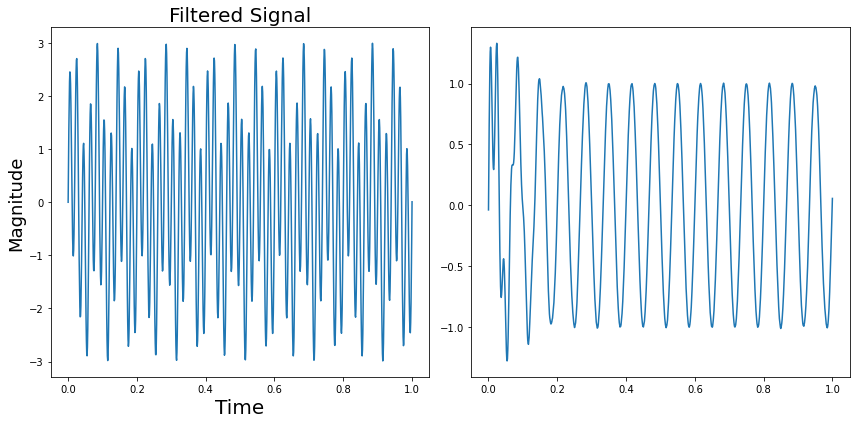

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
 
# Plot output signal of notch filter
ax[0].plot(t, s)
ax[0].set_xlabel('Time', fontsize=20)
ax[0].set_ylabel('Magnitude', fontsize=18)
ax[0].set_title('Original Signal', fontsize=20)
ax[1].plot(t, y)
ax[0].set_xlabel('Time', fontsize=20)
ax[0].set_ylabel('Magnitude', fontsize=18)
ax[0].set_title('Filtered Signal', fontsize=20)

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()